**<h1 style="color:orange">EXERCISE CLASS 3: SMALL SHIFTS AND ATTRIBUTES CONTROL CHARTS</h3>**


## **CONTROL CHARTS FOR SMALL SHIFTS** 
## **EXAMPLE 1** 

The data stored in `small_shifts_example1.csv` represent the mean values of a quantity measured in samples of size $ n = 5 $ taken from a population with $ \sigma = 1 $. 
1. Design a control chart for individuals (I chart) with the information provided.
2. Design a CUSUM chart (with parameters $ h = 4 $ and $ k = 0.5 $) and an EWMA (with param. $ \lambda = 0.2 $) and discuss the results (neglect possible non-random patterns).


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda

In [12]:
# Import the dataset
data = pd.read_csv('../dataset/small_shifts_example1.csv')

# Inspect the dataset
data.head()

,X
0,10.45
1,10.55
2,10.37
3,10.64
4,10.95


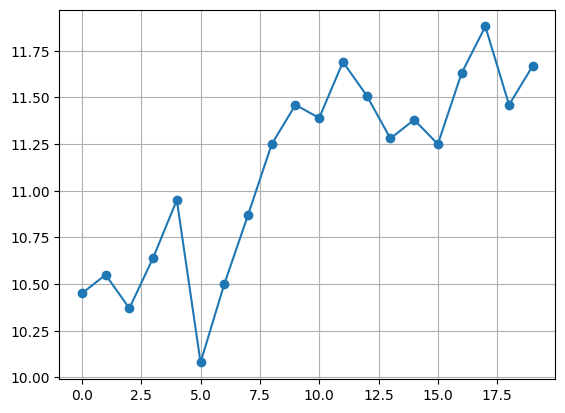

In [13]:
plt.plot(data,'o-')
plt.grid()
plt.show()

### Point 1: I chart

We can compute:
$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{5}} = 0.4472 $$
$$ \mu_0 = \bar{\bar{x}} = 11.113 $$
Then, we can compute the control limits for the I chart. 

In [14]:
n = 5
sigma = 1
sigma_xbar = sigma/np.sqrt(n)
xbarbar = data['X'].mean()

# make a copy of the data
df = data.copy()
# change the name of the column time to I
df.rename(columns={'X':'I'}, inplace=True)

# Create columns for the upper and lower control limits
df['I_UCL'] = xbarbar + 3*sigma_xbar
df['I_CL'] = xbarbar
df['I_LCL'] = xbarbar - 3*sigma_xbar

# Print the first 5 rows of the new dataframe
df.head()

,I,I_UCL,I_CL,I_LCL
0,10.45,12.454641,11.113,9.771359
1,10.55,12.454641,11.113,9.771359
2,10.37,12.454641,11.113,9.771359
3,10.64,12.454641,11.113,9.771359
4,10.95,12.454641,11.113,9.771359


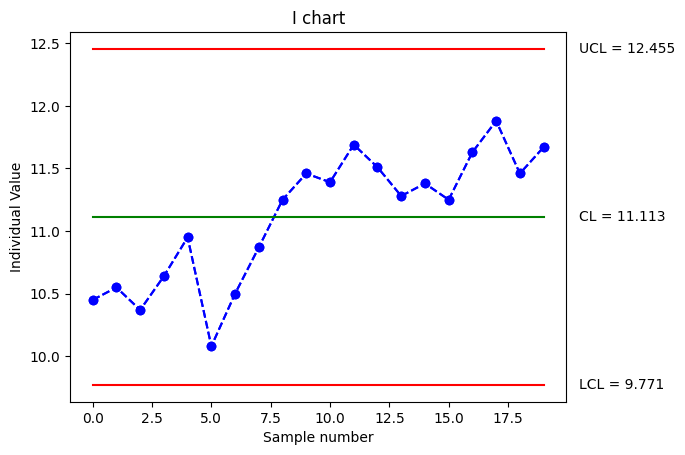

In [15]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.3f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.3f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.3f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
plt.show()

We may detect an OOC state based on the systematic pattern in the chart. 

### Point 2: CUSUM
Design a CUSUM chart (with parameters $ h = 4 $ and $ k = 0.5 $) and an EWMA (with param. $ \lambda = 0.2 $) and discuss the results (neglect possible non-random patterns).

Design the CUSUM control chart. Remember:
- $ C_i^+ = \max(0, \bar{x}_i - (\mu_0 + K) + C_{i-1}^+) $
- $ C_i^- = \max(0, (\mu_0 - K) - \bar{x}_i + C_{i-1}^-) $
- $ H = h \cdot \sigma_{\bar{x}} = 4 \cdot 0.4472 = 1.7889 $
- $ K = k \cdot \sigma_{\bar{x}} = 0.5 \cdot 0.4472 = 0.2236 $

In [16]:
h = 4
k = 0.5

H = h*sigma_xbar
K = k*sigma_xbar

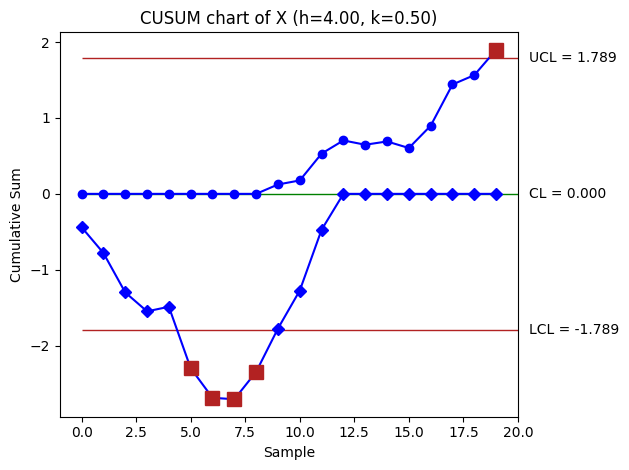

In [17]:
# CUSUM with qda-toolkit:
# CUSUM(data, col_name, params, mean = None, sigma_xbar = None, subset_size = None, plotit = True)

df_CUSUM = qda.ControlCharts.CUSUM(data, 'X', params=(h,k), mean = xbarbar, sigma_xbar = sigma_xbar)

Design the EWMA control chart. Remember:
- $ z_0 = \bar{\bar{x}} = 11.113 $
- $ z_i = \lambda \cdot \bar{x}_i + (1 - \lambda) \cdot z_{i-1} $
- $ a_t = \frac{\lambda}{2-\lambda} \cdot [1 - (1 - \lambda)^{2t}] $

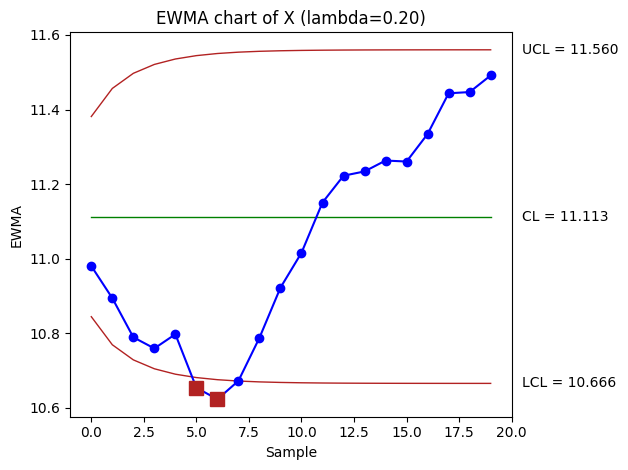

In [18]:
# With qda-toolkit:
# EWMA(data, col_name, params, mean = None, sigma_xbar = None, subset_size = None, plotit = True)

lambda_ = 0.2

df_EWMA = qda.ControlCharts.EWMA(data, 'X', lambda_, xbarbar, sigma_xbar)

## **EXERCISE 1 - n>1** 

The deviation from the nominal center to center distance of a piston rod is known to be characterized by:
- $\mu = 0.4417$ μm
- $\sigma = 3.4914$ μm

A sample of size $n=5$ is acquired on a daily basis. The measurements of 25 consecutive days are reported in the file `small_shifts_phase1.csv`.

1. Design a Xbar-S control chart for the process.
2. Design a CUSUM control chart ($h=4, k=0.5$). 
3. Design an EWMA control chart ($\lambda=0.2$).
4. Import 5 additional samples that were collected in phase 2. Determine if the process is still in control. In the presence of OOCs, estimate the new process mean.

In [19]:
# Import the dataset
data = pd.read_csv("..\Dataset\small_shifts_phase1.csv")

# Inspect the dataset
data.head()

,X1,X2,X3,X4,X5
0,1.2102,-0.5621,-0.7336,4.6353,-2.4700
1,-0.5686,3.6728,5.1017,-3.3084,3.0759
2,-1.6336,1.3034,-1.2234,0.2847,-3.0211
3,2.8496,-8.4910,4.1368,-3.2575,4.1078
4,4.4853,0.6767,-0.6653,3.6053,3.5055


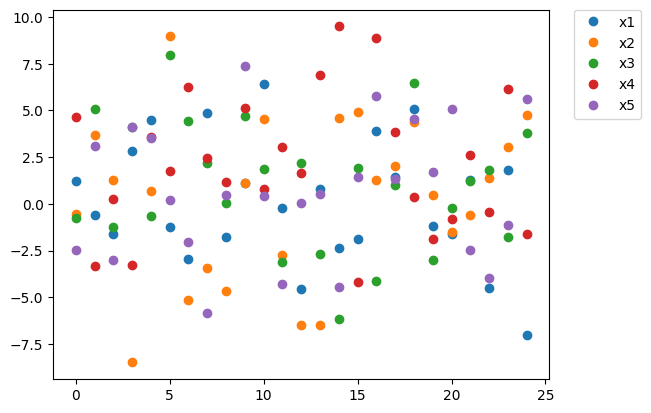

In [20]:
# Make a scatter plot of all the columns against the index
plt.plot(data['X1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['X2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['X3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['X4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['X5'], linestyle='none', marker='o', label = 'x5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Point 1
Design a Xbar-S control chart for the process.

Check if the data is normally distributed.

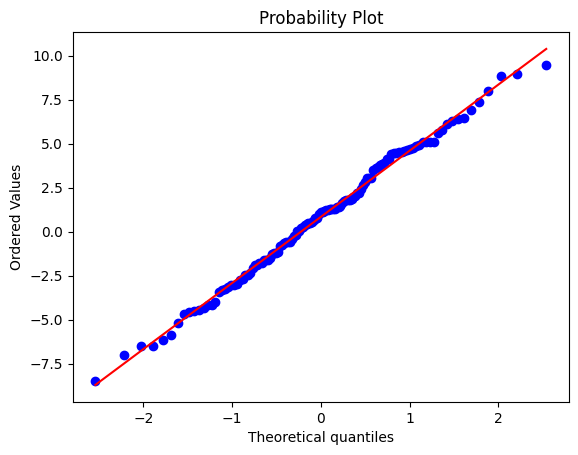

Shapiro-wilk test statistic = 0.994
Shapiro-wilk test p-value = 0.841


(0.9935652017593384, 0.8410183191299438)

In [21]:
# Stack the data into a single column
data_stack = data.stack()

# Check the normality assumption
# We can use the Shapiro-Wilk test
qda.Assumptions(data_stack).normality()


No information is given about the acquisition order of the data. Randomness is only qualitatively assessed from the scatter plot. Let's design an Xbar-S control chart for the process.

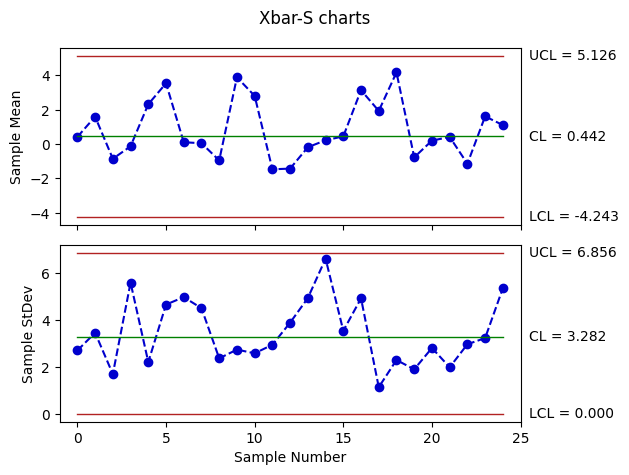

In [22]:
# Input the known mean and standard deviation
mean = 0.4417
stdev = 3.4914
n = 5

data_XS = qda.ControlCharts.XbarS(data, mean = mean, sigma = stdev)

### Point 2
Design a CUSUM control chart ($h=4, k=0.5$) and a CUSUM FIR chart.

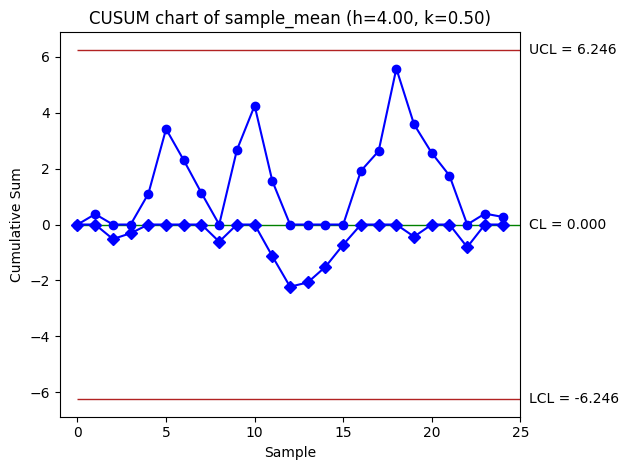

In [23]:
# input the parameters of the CUSUM control chart
h = 4
k = 0.5

# extract the sample_mean column from data_XS and put it in a new dataframe
data_mean = pd.DataFrame(data_XS['sample_mean'])

# Design the CUSUM control chart
data_CUSUM = qda.ControlCharts.CUSUM(data_mean, 'sample_mean', params=(h,k), mean = mean, sigma_xbar = stdev/np.sqrt(n))

### Point 3
Design an EWMA control chart ($\lambda=0.2$).

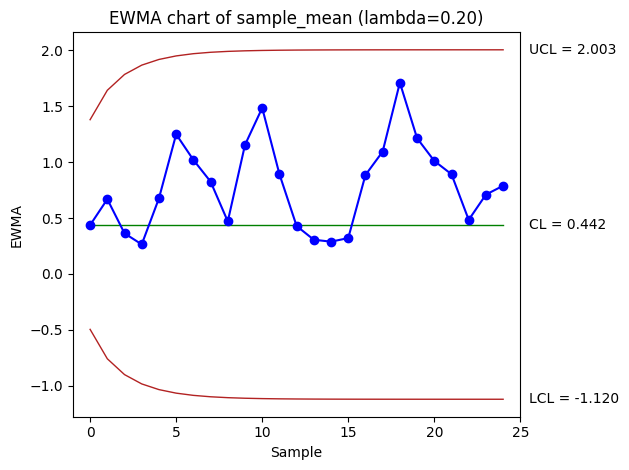

In [24]:
# Input the parameters of the EWMA control chart
lambda_ = 0.2

# Design the EWMA control chart
data_EWMA = qda.ControlCharts.EWMA(data_mean, 'sample_mean', params=(lambda_), mean = mean, sigma_xbar = stdev/np.sqrt(n))

### Point 4
Import the 5 additional samples that were collected in phase 2. Determine if the process is still in control. In the presence of OOCs, estimate the new process mean.

In [25]:
# Import the dataset
data_p2 = pd.read_csv('..\Dataset\small_shifts_phase2.csv')
data_p2.head()

phase1_size = len(data)

In [26]:
data_all = pd.concat([data, data_p2], ignore_index=True)

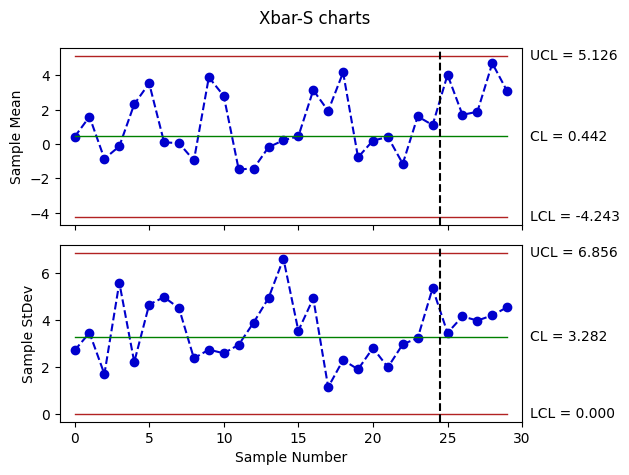

In [27]:
data_XS = qda.ControlCharts.XbarS(data_all, mean = mean, sigma = stdev, subset_size = phase1_size)

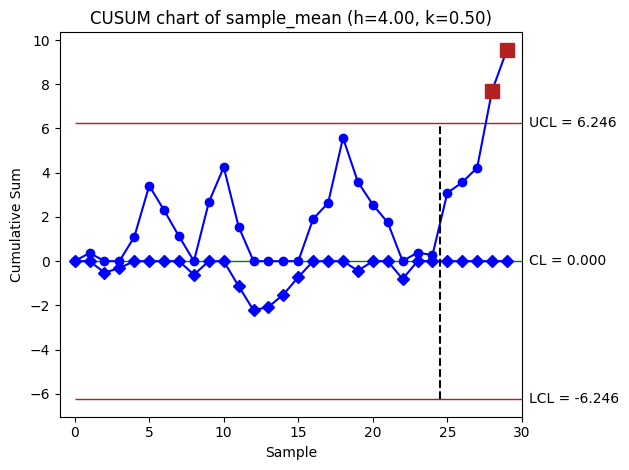

In [28]:
# extract the sample_mean column from data_XS and put it in a new dataframe
data_mean = pd.DataFrame(data_XS['sample_mean'])

# Design the CUSUM control chart
data_CUSUM = qda.ControlCharts.CUSUM(data_mean, 'sample_mean', params=(h,k), mean = mean, sigma_xbar = stdev/np.sqrt(n), subset_size=phase1_size)

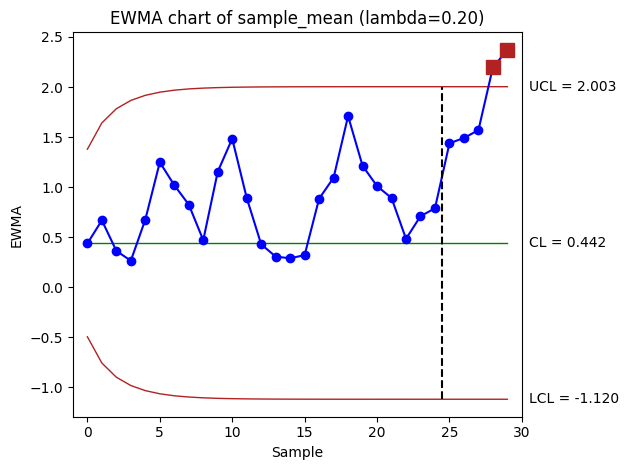

In [29]:
data_EWMA = qda.ControlCharts.EWMA(data_mean, 'sample_mean', params=(lambda_), mean = mean, sigma_xbar = stdev/np.sqrt(n), subset_size=phase1_size)

The new estimated process mean is calculated by the following formula:
$$\hat{\mu} = \mu_0 + K + \frac{C_i^+}{N_h} = 90 + 0.8 \cdot \frac{1}{2} + \frac{3.89}{8} = 90.886$$

Where:
- $N_h$ is the number of consecutive non-zero values of the upper cumulator when the OOC is detected.

In [30]:
# Create a time series Nh that is 0 when Ci+ is 0 and increases by 1 for every consecutive Ci+ > 0
Nh = pd.Series(0, index=data_CUSUM.index)
counter = 0

for idx in data_CUSUM.index:
    if data_CUSUM.loc[idx, 'Ci+'] > 0:
        # If Ci+ is positive, increment the counter
        counter += 1
        Nh[idx] = counter
    else:
        # If Ci+ is 0, reset the counter to 0
        counter = 0
        Nh[idx] = 0

# Add Nh+ column to the CUSUM dataframe
data_CUSUM['Nh+'] = Nh

In [31]:
# Compute the control limit and get the index of the first out of control point
H = h*stdev/np.sqrt(n)
first_out_of_control = data_CUSUM[data_CUSUM['Ci+'] > H].index[0]
print('The first out of control point is at index:', first_out_of_control)

The first out of control point is at index: 28


In [32]:
# Get the value of Nhs
Nh = data_CUSUM['Nh+'].iloc[first_out_of_control]
print('N_h = {}'.format(Nh))

# Get the value of K
k = 0.5
K = k * stdev / np.sqrt(n)
print('K = {}'.format(K))

# Get the cusum value at the first OOC sample
print('C+_i = {}'.format(data_CUSUM['Ci+'].iloc[first_out_of_control]))

# Calculate the estimated mean
mu_hat = mean + K + data_CUSUM['Ci+'].iloc[first_out_of_control] / Nh
print('mu_hat = {}'.format(mu_hat))



N_h = 6
K = 0.7807007736642766
C+_i = 7.7073233580143405
mu_hat = 2.5069546666666667


## **CONTROL CHARTS FOR ATTRIBUTES** 


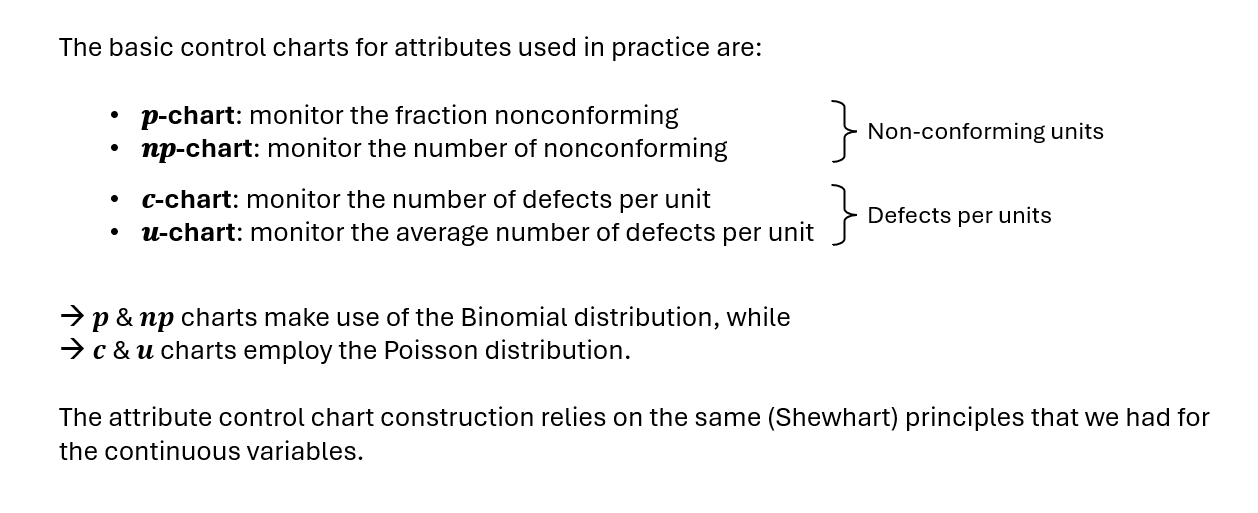

In [33]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### EXERCISE 1

The supervisor for a call center wants to evaluate the process for answering customer phone calls. The supervisor records in the file *UnansweredCalls.csv* the total number of incoming calls and the number of unanswered calls for 21 days. 

Design a p-chart to monitor the proportion of unanswered calls.


In [34]:
df = pd.read_csv("../Data/UnansweredCalls.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/UnansweredCalls.csv'

In [ ]:
df

,Total Calls,Unanswered Calls,p,std_dev,UCL,LCL
0,250,25,0.100000,0.018598,0.151401,0.039816
1,257,27,0.105058,0.018343,0.150636,0.040581
2,260,27,0.103846,0.018236,0.150318,0.040899
3,256,27,0.105469,0.018378,0.150743,0.040473
4,259,28,0.108108,0.018272,0.150423,0.040794
5,259,22,0.084942,0.018272,0.150423,0.040794
6,250,21,0.084000,0.018598,0.151401,0.039816
7,260,30,0.115385,0.018236,0.150318,0.040899
8,254,24,0.094488,0.018451,0.150960,0.040257
9,253,27,0.106719,0.018487,0.151069,0.040147


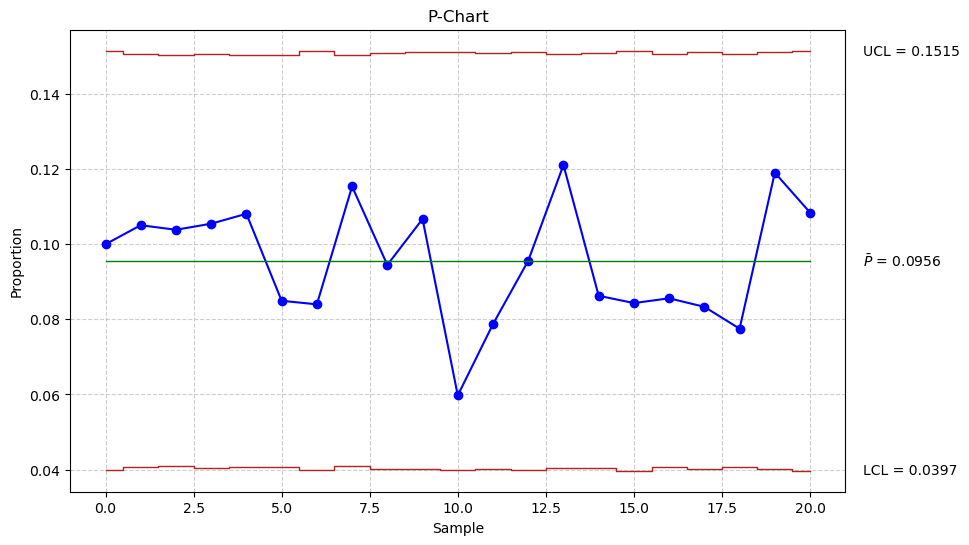

In [ ]:
df["p"] = df["Unanswered Calls"] / df["Total Calls"]
p_bar = df["p"].mean()

# UCL, LCL, CL
df["std_dev"] = np.sqrt((p_bar * (1 - p_bar)) / df["Total Calls"])
df['P_CL'] = p_bar  # Center Line (CL) for the p-chart
df["P_UCL"] = df['P_CL'] + 3 * df["std_dev"]
df["P_LCL"] = df['P_CL'] - 3 * df["std_dev"]
df["P_LCL"] = df["P_LCL"].clip(lower=0)  # LCL cannot be <0

# p-Chart
plt.figure(figsize=(10, 6))
plt.plot(df["p"], marker='o', color='blue', label='Proporzione osservata')
plt.step(df.index, df["P_CL"], where='mid', color='g', linestyle='-', linewidth=1)
plt.step(df.index, df["P_UCL"], where='mid', color='firebrick', linestyle='-', linewidth=1)
plt.step(df.index, df["P_LCL"], where='mid', color='firebrick', linestyle='-', linewidth=1)
plt.xlabel('Sample')
plt.ylabel('Proportion')
plt.title('P-Chart')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['P_UCL'].iloc[0], 'UCL = {:.4f}'.format(df['P_UCL'].iloc[-1]), verticalalignment='center')
plt.text(len(df)+.5, p_bar, r'$\bar{P}$' + ' = {:.4f}'.format(p_bar), verticalalignment='center')
plt.text(len(df)+.5, df['P_LCL'].iloc[0], 'LCL = {:.4f}'.format(df['P_LCL'].iloc[-1]), verticalalignment='center')
plt.grid(True, linestyle='--', alpha=0.6)
# set the x-axis limits
plt.xlim(-1, len(df))
plt.show()

None of the subgroup proportions are outside of the control limits. Furthermore, the points inside the limits display a random pattern. 

This P chart does not provide any evidence for lack of control. Thus, the process is in control.


### EXERCISE 2

A quality engineer assesses whether the process used to manufacture light bulbs is in control. 
The engineer tests 500 light bulbs each hour for three 8-hour shifts and records the number of bulbs that did not light (defectives) in the file LightBulbs.csv.
Design an np-chart to monitor the number of defective light bulbs.



In [ ]:
df = pd.read_csv("../Data/LightBulbs.csv")
df.head()

,Subgroup ID,Defectives
0,101,5
1,102,8
2,103,13
3,104,11
4,105,8


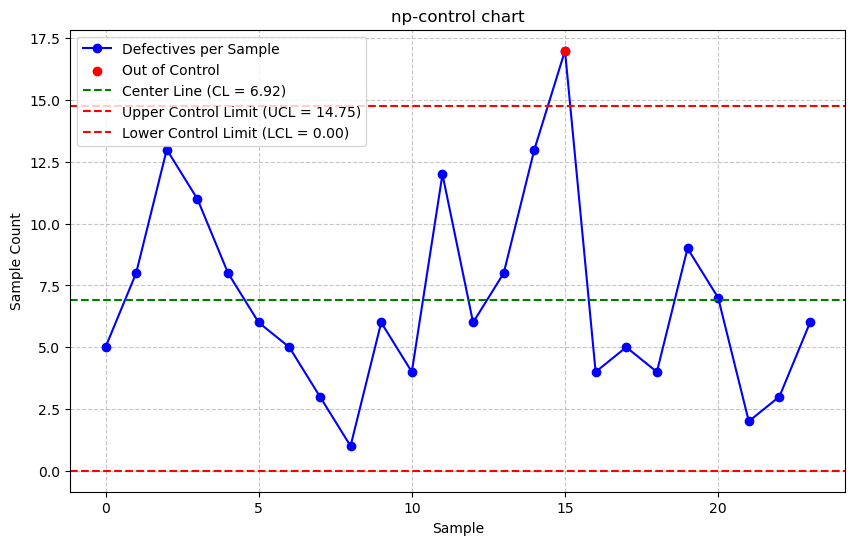

In [ ]:
n = 500
p_hat = df['Defectives'].mean() / n

center_line = n * p_hat
UCL = center_line + 3 * np.sqrt(n * p_hat * (1 - p_hat))
LCL = max(0, center_line - 3 * np.sqrt(n * p_hat * (1 - p_hat)))

out_of_control = df[(df['Defectives'] > UCL) | (df['Defectives'] < LCL)]
plt.figure(figsize=(10, 6))
plt.plot(df['Defectives'], marker='o', linestyle='-', color='blue', label='Defectives per Sample')
plt.scatter(out_of_control.index, out_of_control['Defectives'], color='red', zorder=5, label='Out of Control')
plt.axhline(center_line, color='green', linestyle='--', linewidth=1.5, label=f'Center Line (CL = {center_line:.2f})')
plt.axhline(UCL, color='red', linestyle='--', linewidth=1.5, label=f'Upper Control Limit (UCL = {UCL:.2f})')
plt.axhline(LCL, color='red', linestyle='--', linewidth=1.5, label=f'Lower Control Limit (LCL = {LCL:.2f})')

plt.title('np-control chart')
plt.xlabel('Sample')
plt.ylabel('Sample Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### EXERCISE 3

A quality engineer for a wallpaper manufacturer wants to assess the stability of the printing process. Every hour, the engineer takes a sample of 100 feet of wallpaper and counts the number of printing defects, which include print smears, pattern distortions, and missing ink. The collected data are reported in WallpaperDefects.csv.
Design a C chart to monitor the number of defects.


In [ ]:
# Import the dataset
data = pd.read_csv('../Data/WallpaperDefects.csv')

# Inspect the dataset
data.head()

,Sample ID,Defects
0,1,24
1,2,28
2,3,36
3,4,47
4,5,23


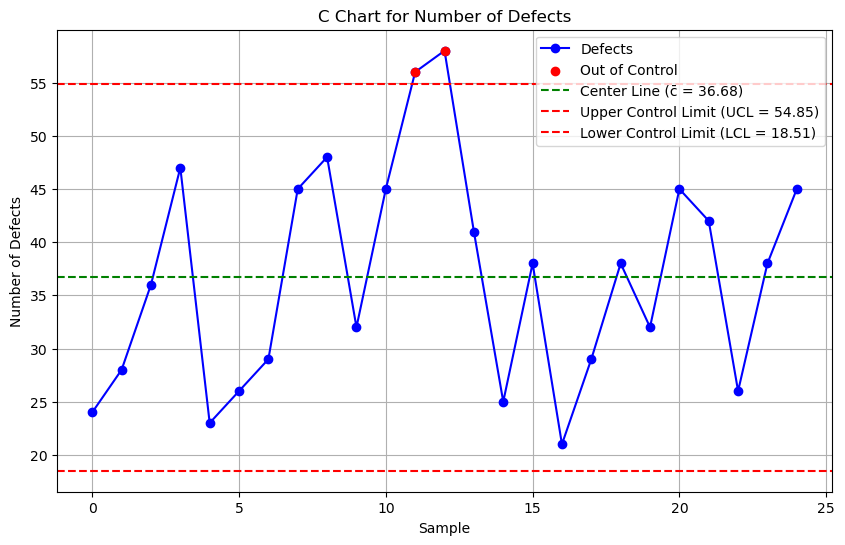

In [ ]:
# Calculate the average number of defects
c_bar = data['Defects'].mean()

# Calculate control limits
UCL = c_bar + 3 * np.sqrt(c_bar)
LCL = max(0, c_bar - 3 * np.sqrt(c_bar))

# Plot the C chart
plt.figure(figsize=(10, 6))
plt.plot(data['Defects'], marker='o', linestyle='-', color='b', label='Defects')

# Highlight points outside control limits
out_of_control = data[(data['Defects'] > UCL) | (data['Defects'] < LCL)]
plt.scatter(out_of_control.index, out_of_control['Defects'], color='red', zorder=5, label='Out of Control')

# Plot control lines
plt.axhline(y=c_bar, color='g', linestyle='--', label=f'Center Line (c̄ = {c_bar:.2f})')
plt.axhline(y=UCL, color='r', linestyle='--', label=f'Upper Control Limit (UCL = {UCL:.2f})')
plt.axhline(y=LCL, color='r', linestyle='--', label=f'Lower Control Limit (LCL = {LCL:.2f})')

# Add titles and labels
plt.title('C Chart for Number of Defects')
plt.xlabel('Sample')
plt.ylabel('Number of Defects')
plt.legend()
plt.grid(True)
plt.show()

### EXERCISE 4

A manager for a transcription company wants to assess the quality of the transcription service. The manager randomly selects 25 sets of pages from consecutive orders and counts the number of typographical errors (defects). Each set has a different number of pages. Data are stored in TranscriptionErrors.csv.
Design a u chart  to monitor the number of errors.



In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Import the dataset
data = pd.read_csv('../Data/TranscriptionErrors.csv')

# Inspect the dataset
data.head()

,Number of Pages,Errors
0,30,3
1,24,4
2,23,2
3,25,6
4,32,5


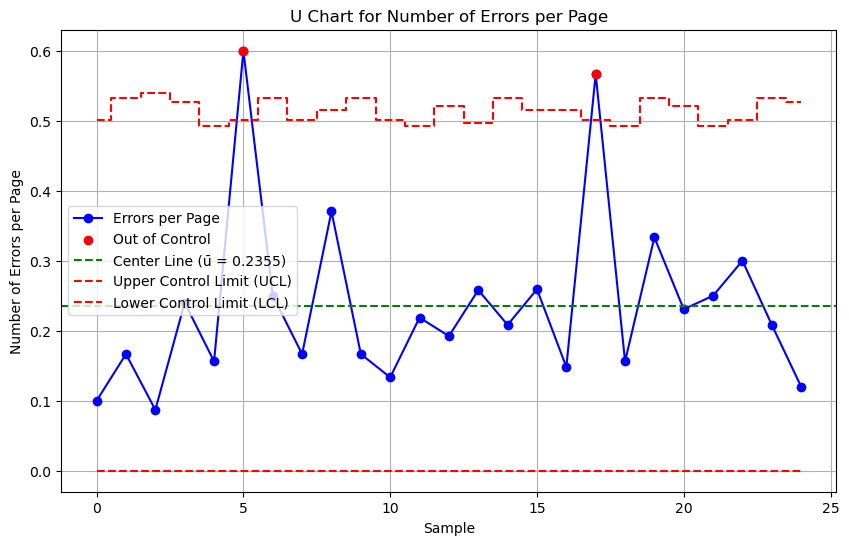

In [ ]:
# Calculate the average number of errors per page
data['Errors_per_Page'] = (data['Errors'] / data['Number of Pages'])

# Calculate the overall average number of errors per page (u_bar)
u_bar = data['Errors_per_Page'].mean()

# Calculate control limits
L = 3  # Typically, L = 3
UCL = u_bar + L * np.sqrt(u_bar / data['Number of Pages'])
LCL = u_bar - L * np.sqrt(u_bar / data['Number of Pages'])
LCL[LCL < 0] = 0  # Lower control limit cannot be negative

# Plot the U chart
plt.figure(figsize=(10, 6))
plt.plot(data['Errors_per_Page'], marker='o', linestyle='-', color='b', label='Errors per Page')

# Highlight points outside control limits
out_of_control = data[(data['Errors_per_Page'] > UCL) | (data['Errors_per_Page'] < LCL)]
plt.scatter(out_of_control.index, out_of_control['Errors_per_Page'], color='red', zorder=5, label='Out of Control')

# Plot control lines
plt.axhline(y=u_bar, color='g', linestyle='--', label=f'Center Line (ū = {u_bar:.4f})')
plt.step(data.index, UCL, where='mid', color='r', linestyle='--', label='Upper Control Limit (UCL)')
plt.step(data.index, LCL, where='mid', color='r', linestyle='--', label='Lower Control Limit (LCL)')

# Add titles and labels
plt.title('U Chart for Number of Errors per Page')
plt.xlabel('Sample')
plt.ylabel('Number of Errors per Page')
plt.legend()
plt.grid(True)
plt.show()